## CS 2064: Shirin Mohammadian

### Data Science Research questions
1. What are the trends in the popularity of different music genres on the music streaming platform, Deezer? 
2. Who are the top 5 most streamed artists every year for the last decade on Spotify?
3. What is the distribution of AIDS related deaths in children versus adults in Iran between 1990-2020?

### Sources
- https://api.deezer.com/genre
- https://en.wikipedia.org/wiki/List_of_most-streamed_artists_on_Spotify
- https://corgis-edu.github.io/corgis/csv/aids/

In [65]:
'''Imports and Utility Functions'''
import requests 
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import html 
import os
import matplotlib.pyplot as plt

In [11]:
''' Public API: your findings '''

#Utilizing Deezer API to analyze the ranking of music genres
api_url = "https://api.deezer.com/genre"

#Using get() and json() to retrieve data from the API
response = requests.get(api_url)
genre_data = response.json()['data']

#Printing the list 
print("Most Popular Music Genres According to Deezer Music:")
for index, genre in enumerate(genre_data, start=1):
    print(f"{index}. {genre.get('name')}")

Most Popular Music Genres According to Deezer Music:
1. All
2. Pop
3. Rap/Hip Hop
4. Reggaeton
5. Rock
6. Dance
7. R&B
8. Alternative
9. Christian
10. Electro
11. Folk
12. Reggae
13. Jazz
14. Country
15. Salsa
16. Traditional Mexicano
17. Classical
18. Films/Games
19. Metal
20. Soul & Funk
21. African Music
22. Asian Music
23. Blues
24. Brazilian Music
25. Cumbia
26. Indian Music
27. Kids
28. Latin Music


In [63]:
''' Web Scraping: your findings '''

#URL of the source web scrapped 
url = 'https://en.wikipedia.org/wiki/List_of_most-streamed_artists_on_Spotify'

#Sending get() request to the url
response = requests.get(url)

#Parsing HTML text with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

#Locating the table with information on the most-streamed artists each year
table = soup.find('table', class_='wikitable')

#Initializing a dictionary to store information on the 5 most-streamed artists each year
top_artists_each_year = {}

#Finding all rows in the table, excluding the header row
if table:
    rows = table.find_all('tr')[1:]
    #Extracting the information, the year and artist names
    for row in rows:
        cells = row.find_all(['th', 'td'])
        if len(cells) >= 6:
            artists = [cell.get_text(strip=True) for cell in cells[1:6]]
            year = cells[0].get_text(strip=True)
            top_artists_each_year[year] = artists
            
#Printing the top 5 most-streamed artists on Spotify each year
print("Top 5 Most Streamed Artists on Spotify Each Year for the Last Decade:")
for year, artists in top_artists_each_year.items():
    print(f"\n{year}:")
    for rank, artist in enumerate(artists, start=1):
        print(f"{rank}. {artist}")

Top 5 Most Streamed Artists on Spotify Each Year for the Last Decade:

2013[4]:
1. Macklemore & Ryan Lewis
2. Avicii
3. Daft Punk
4. Eminem
5. Imagine Dragons

2014[5]:
1. Ed Sheeran(860 million)
2. Eminem
3. Coldplay
4. Calvin Harris
5. Katy Perry

2015[6]:
1. Drake(1.8 billion)
2. Ed Sheeran
3. The Weeknd
4. Maroon 5
5. Kanye West

2016[7]:
1. Drake(4.7 billion)
2. Justin Bieber
3. Rihanna
4. Twenty One Pilots
5. Kanye West

2017[8]:
1. Ed Sheeran(6.3 billion)
2. Drake
3. The Weeknd
4. Kendrick Lamar
5. The Chainsmokers

2018[9]:
1. Drake(8.2 billion)
2. Post Malone
3. XXXTentacion
4. J Balvin
5. Ed Sheeran

2019[10]:
1. Post Malone(6.5 billion)
2. Billie Eilish
3. Ariana Grande
4. Ed Sheeran
5. Bad Bunny

2020[11]:
1. Bad Bunny(8.3 billion)
2. Drake
3. J Balvin
4. Juice Wrld
5. The Weeknd

2021[12]:
1. Bad Bunny(9.1 billion)
2. Taylor Swift
3. BTS
4. Drake
5. Justin Bieber

2022[13]:
1. Bad Bunny(18.5 billion)
2. Taylor Swift
3. Drake
4. The Weeknd
5. BTS

2023[14]:
1. Taylor Swift(

In [62]:
''' Direct Download: your findings '''

#URL of the CORGIS dataset
corgis_url = "https://corgis-edu.github.io/corgis/csv/aids/"

#File name for the dataset downloaded
file_name = "aids.csv"

#Downloading file if it does not exist
def download_file(url, file_name):
    if not os.path.isfile(file_name):
        with open(file_name, "wb") as f:
            f.write(requests.get(url).data)

#Loading the dataset into a Pandas DataFrame
download_file(corgis_url, file_name)
data_df = pd.read_csv(file_name)

#Presenting the DataFrame as a string, printing the data
print("Number of AIDS Related Deaths in Iran From 1900-2020 in Adults and Children:")
print(data_df.to_string(index=False))

Number of AIDS Related Deaths in Iran From 1900-2020 in Adults and Children:
 Year  AIDS Related Deaths in Adults  AIDS Related Deaths in Children
 1990                            100                              100
 1991                            100                              100
 1992                            100                              100
 1993                            100                              100
 1994                            100                              100
 1995                            100                              100
 1996                            100                              100
 1997                            200                              100
 1998                            200                              100
 1999                            500                              100
 2000                            500                              100
 2001                            500                              100
 2002        

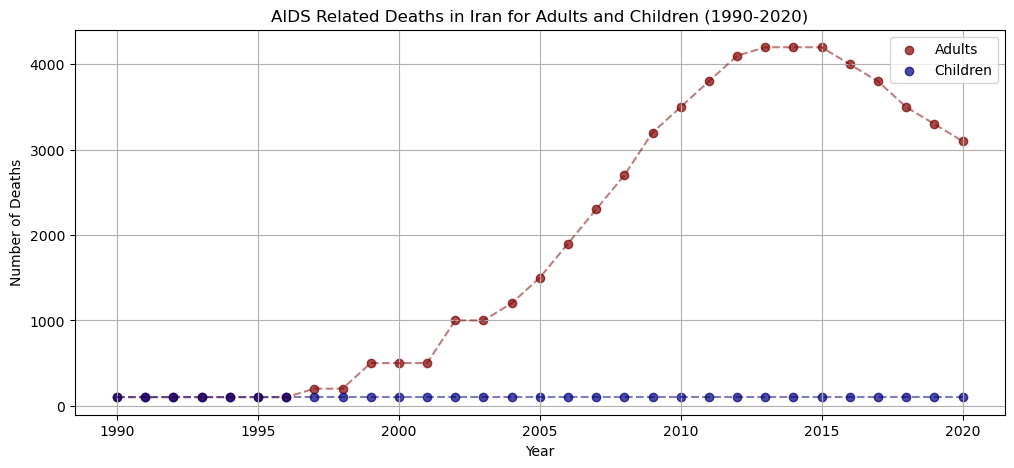

In [61]:
''' Visualization: '''

#Data from the dataset
data = {
    'Year': [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
             2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'AIDS Related Deaths in Adults': [100, 100, 100, 100, 100, 100, 100, 200, 200, 500, 500, 500, 1000, 1000, 1200, 1500, 1900, 2300, 
                                      2700, 3200, 3500, 3800, 4100, 4200, 4200, 4200, 4000, 3800, 3500, 3300, 3100],
    'AIDS Related Deaths in Children': [100] * 31
}

data_df = pd.DataFrame(data)

#Creating a scatter plot with lines to clearly show trends
plt.figure(figsize=(12, 5))
plt.scatter(data_df['Year'], data_df['AIDS Related Deaths in Adults'], label='Adults', color='maroon', alpha=0.7)
plt.scatter(data_df['Year'], data_df['AIDS Related Deaths in Children'], label='Children', color='navy', alpha=0.7)

#Connecting the lines to points
plt.plot(data_df['Year'], data_df['AIDS Related Deaths in Adults'], color='maroon', alpha=0.5, linestyle='--')
plt.plot(data_df['Year'], data_df['AIDS Related Deaths in Children'], color='navy', alpha=0.5, linestyle='--')

plt.title('AIDS Related Deaths in Iran for Adults and Children (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()

**Visual Description:** The graph demonstrates the distribution of AIDS related deaths in the last 30 years amongst adults and children in Iran. Over the years, the number of deaths in children stayed consistent at around 100. As for adults, the number of deaths soared over the years with a peak at 4200 deaths between 2013-2015. The amount of deaths in adults is significantly higher than in children according to this data.

**Visual Discussion:** It is important to takeaway that in an underrepresented country like Iran, many individuals do not have access to healthcare to be treated for disease, which leads to high death rates that come from lack of availability to treatment. For children, even with much lower death rates, these children also die from not having the resources to be treated to prevent disease progression and early attacks on their immune system. Even though there is no cure, there are ways for people to slow down this virus, but unfortunately many individuals in countries like Iran aren't able to take advantage of that, leading to thousands of adults and about a hundred children dying from it each year.